In [4]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

# 1 Feedforward: Building a ReLU neural net- work

## 1.1 Draw a network with:
* 2 inputs
* 1 hidden layers with 4 hidden units and a 
* 1-class output (for binary classification)

## 1.2 Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

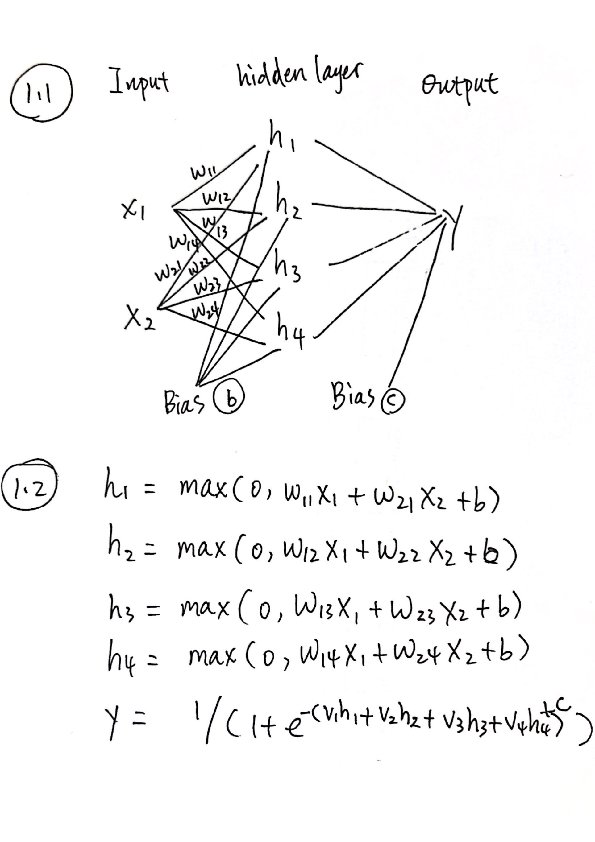

In [3]:
from wand.image import Image as WImage
img = WImage(filename='/Users/maggiejiang/Desktop/d.pdf')
img

# 3. Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [5]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))

def ff_nn_ReLu(X, W, b, V, c):
    res = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(res,np.array(V))+c)

In [8]:
W = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = 1
X = [[1, -1], [0, -1], [0, 1]]
ff_nn_ReLu(X,W,b,V,c)

array([0.81757448, 0.62245933, 0.62245933])

#### The class probabilities associated with the forward pass of each sample are 0.81757448, 0.62245933, 0.62245933.

# 2. Gradient Descent

## 1. What are the partial derivatives of f with respect to x and to y?

$f_x(x,y) = -3x^2+100x-200y^2$

$f_y(x,y) = 800y^3-400xy$

## 2. Create a visualization of the contours of this function.

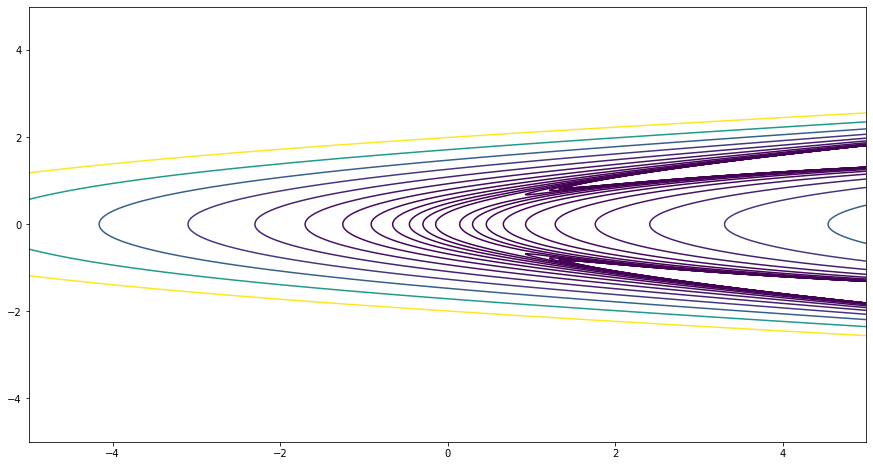

In [14]:
x=np.arange(-5,5,0.005)
y=np.arange(-5,5,0.005)
X, Y=np.meshgrid(x, y)
Z = 3-X**3 + 50*(2*Y**2-X)**2
plt.figure(figsize=(15,8))
plt.contour(X,Y,Z,np.logspace(-1.5,3.5,20,base=10))

## 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [15]:
def grad_f(vector):
    x, y = vector
    df_dx = (2/125)*x 
    df_dy = (2/25)*y
    return np.array([df_dx, df_dy])

In [16]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-10,10,size = 2)
    else:
        point = starting_point
    trajectory = [point]
    # interations
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

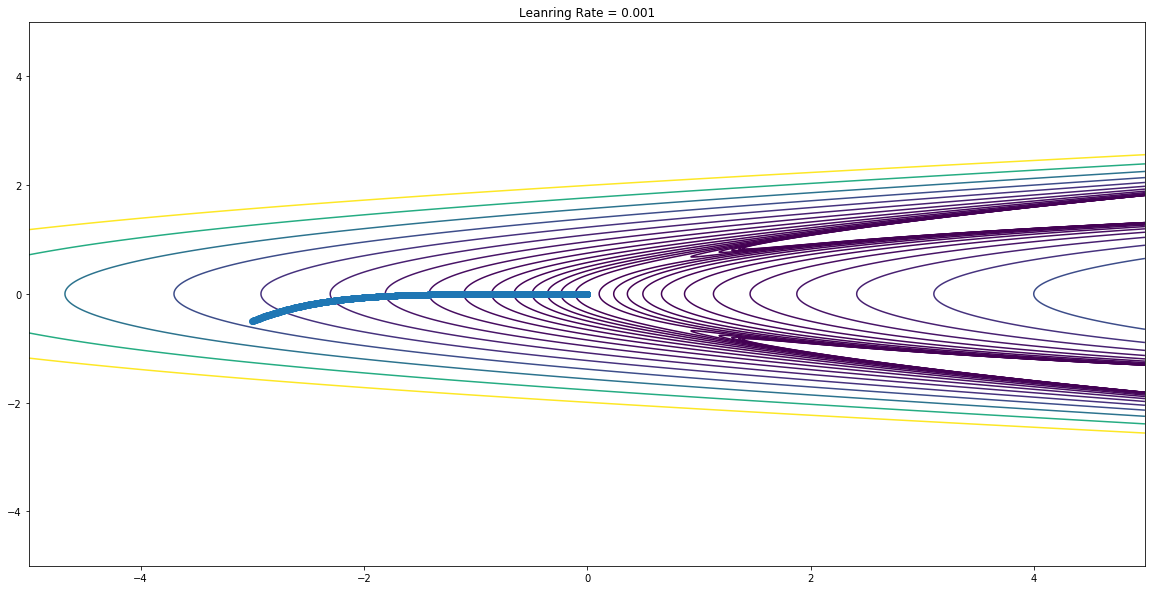

In [40]:
# learning rate = 0.1
traj = grad_descent([-3,-0.5],iterations=10000, learning_rate=0.1)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 0.001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

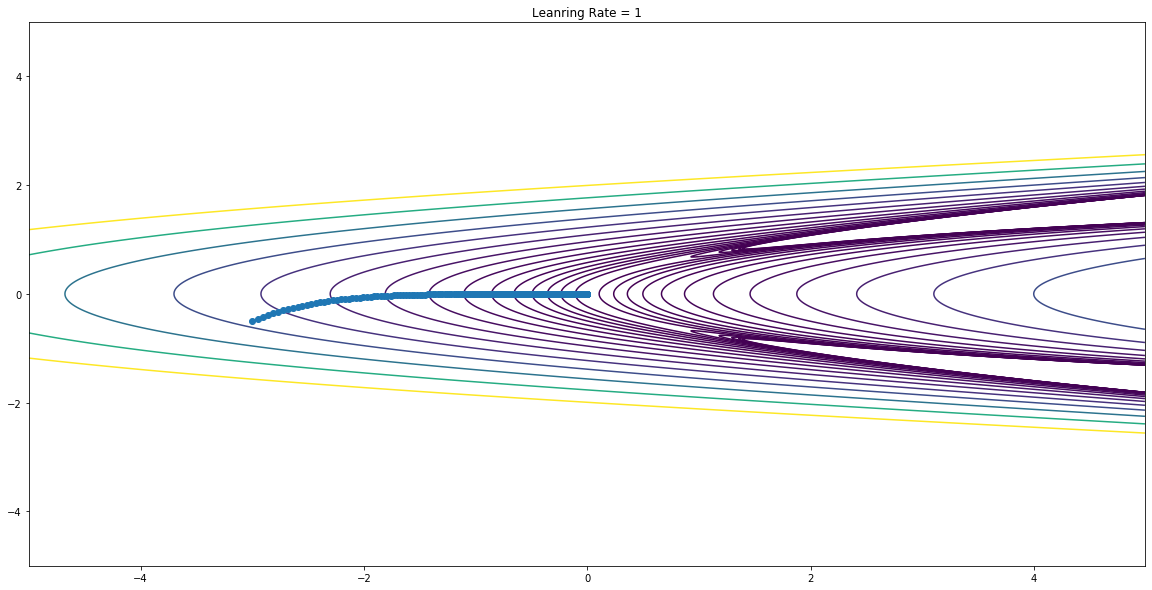

In [42]:
# learning rate = 1
traj = grad_descent([-3,-0.5],iterations=10000, learning_rate=1)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 1')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

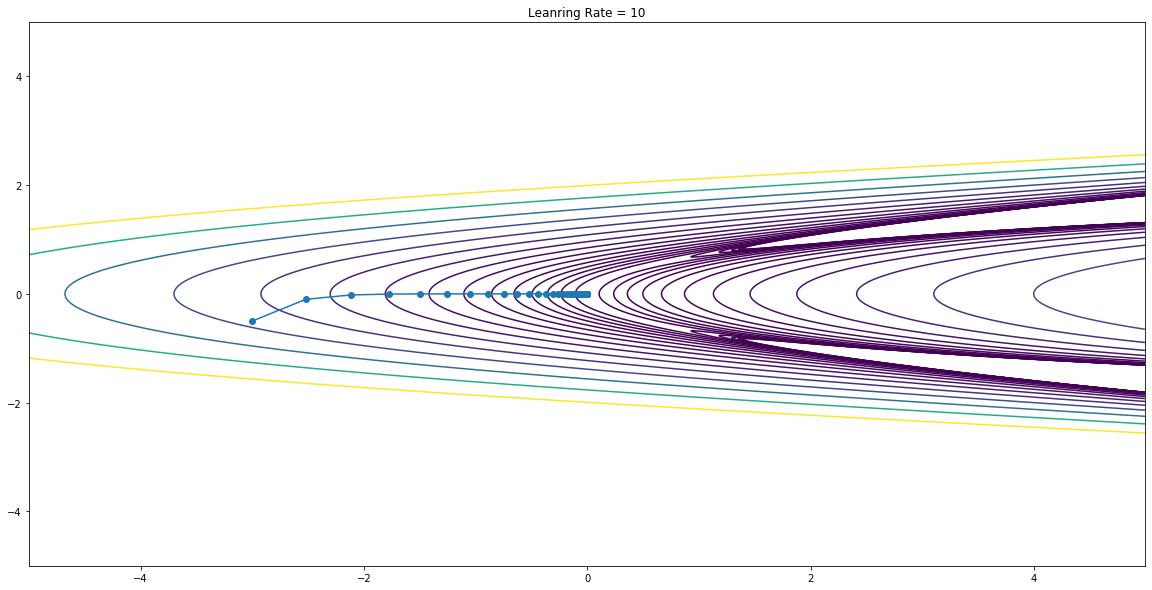

In [43]:
# learning rate = 10
traj = grad_descent([-3,-0.5],iterations=10000, learning_rate=10)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 10')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

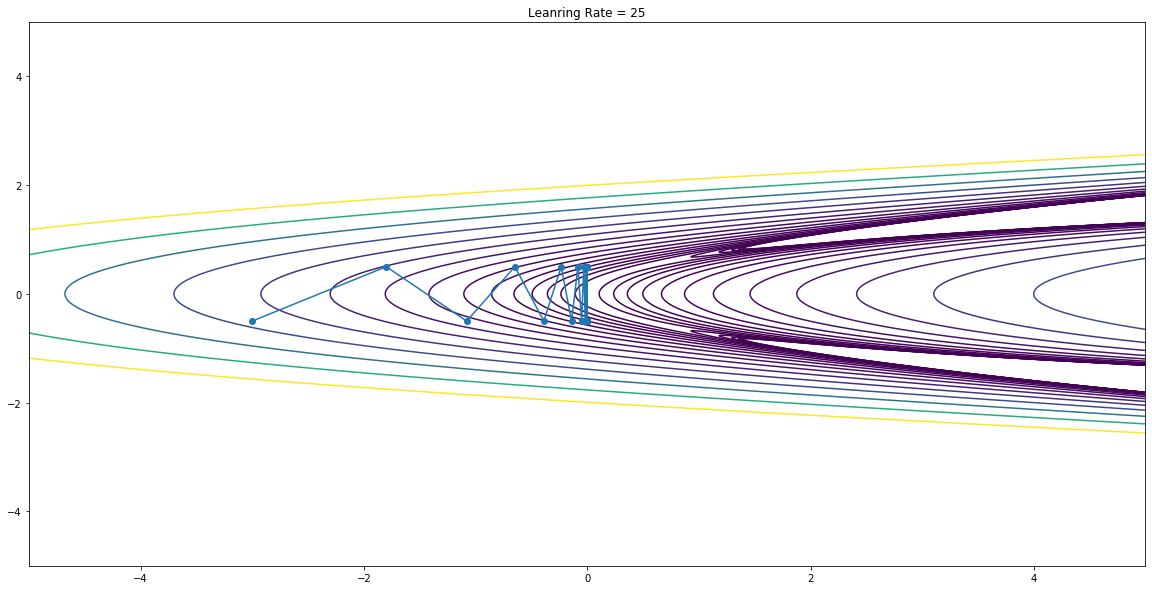

In [46]:
# learning rate = 100
traj = grad_descent([-3,-0.5],iterations=10000, learning_rate=25)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 25')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [47]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size = 2)
    trajectory  = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

## alpha = 0.9

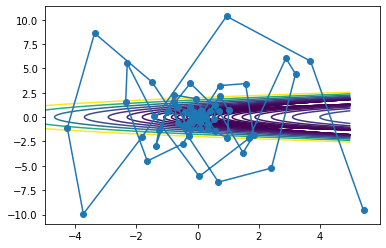

In [51]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=20, alpha=.9)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## alpha = 0.5

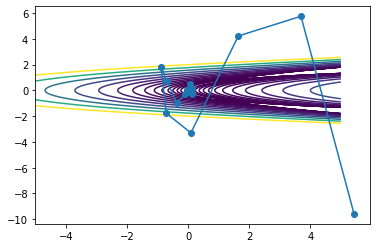

In [52]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=20, alpha=.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## alpha = 0.1

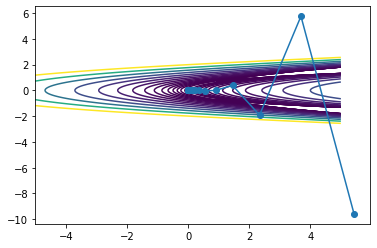

In [53]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=20, alpha=.1)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 3. Backprop

## 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.


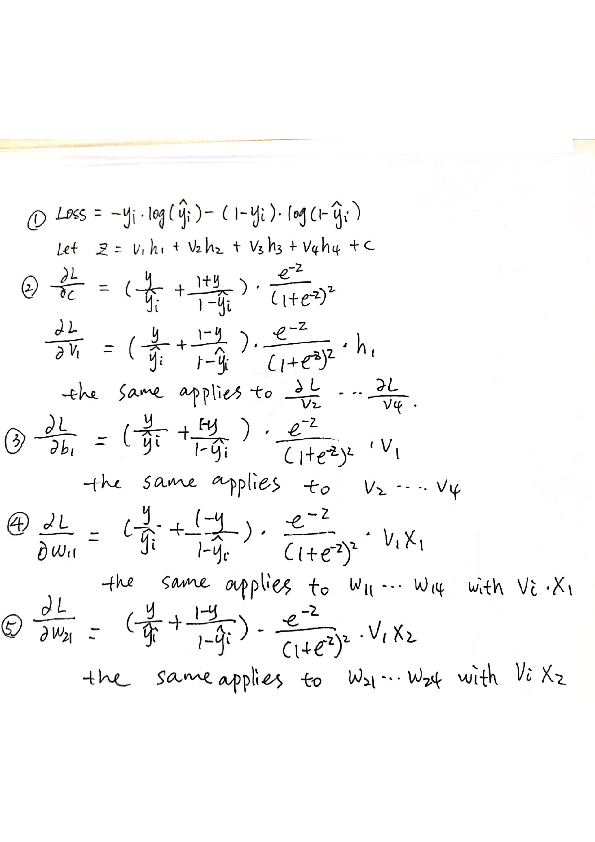

In [56]:
img2 = WImage(filename='/Users/maggiejiang/Desktop/image.pdf')
img2

## 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [58]:
import tensorflow as tf
def ff_nn_reLu(X,params):
    h = tf.nn.relu(tf.matmul(params[0],X)+params[1])
    return tf.nn.sigmoid(tf.matmul(params[2],h)+params[3])
loss = tf.keras.losses.BinaryCrossentropy()

In [59]:
def grad_f(X,Y,params):
    with tf.GradientTape() as tape:
        y_hat = ff_nn_reLu(X,params)
        f = loss(Y,y_hat)
    print(tape.gradient(f,params))

In [60]:
W = tf.random.uniform((4, 2), minval=-1, maxval=1)
B = tf.random.uniform((4, 1), minval=-1, maxval=1)
V = tf.random.uniform((1, 4), minval=-1, maxval=1)
C = tf.random.uniform((1,), minval=-1, maxval=1)
X = tf.random.uniform((2,3), minval=-2, maxval=2)
Y = tf.constant([0,0,1])
params = [tf.Variable(p) for p in [W,B,V,C]]

In [61]:
 grad_f(X,Y,params)

[<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.02282462, -0.05752338],
       [ 0.14655866,  0.11629797],
       [-0.05663014, -0.14272124],
       [-0.07075195, -0.17831151]], dtype=float32)>, <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.03527676],
       [-0.03599239],
       [-0.08752516],
       [-0.10935123]], dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.01195332, 0.14576587, 0.03074345, 0.1502714 ]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.15327919], dtype=float32)>]


## 3. Generate a synthetic dataset like the XOR pattern (see below).

In [62]:
def binary_classification_data(N):
    X = np.random.uniform(low=-2, high=2, size=(N, 2)).astype(np.float32)
    Y = (X[:, 0] * X[:, 1] > 0).astype(np.int)
    return X,Y

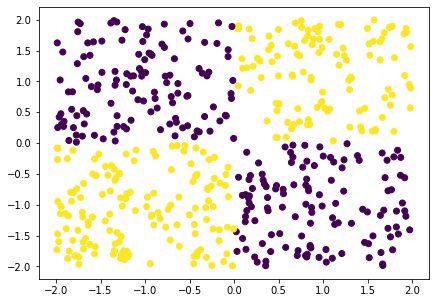

In [72]:
X,Y = binary_classification_data(500)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0],X[:, 1],c=Y)

## 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [88]:
def grad_step(X,Y,params,step_size):
    with tf.GradientTape() as tape:
          y_hat = ff_nn_reLu(X,params)
          lo = loss(Y,y_hat)
    grads = tape.gradient(lo,params)
    for var,grad in zip(params,grads):
          var.assign(var - step_size*grad)
    return lo

In [89]:
def grad_desc(x,y,params,step_size,n_iters):
    x = tf.Variable(x.T)
    y = tf.Variable(y)
    W = tf.random.uniform((4, 2), minval=-1, maxval=1)
    B = tf.random.uniform((4, 1), minval=-1, maxval=1)
    V = tf.random.uniform((1, 4), minval=-1, maxval=1)
    C = tf.random.uniform((1,), minval=-1, maxval=1)
    params = [tf.Variable(p) for p in [W,B,V,C]]
    losses = []
    for i in range(n_iters):
        losses.append(grad_step(x,y,params,step_size))  
    return losses,params 

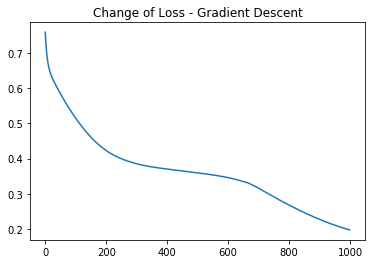

In [92]:
losses,params =grad_desc(X,Y,params,0.1,1000)
plt.plot(losses)
plt.title("Change of Loss - Gradient Descent")
plt.show()

## 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [97]:
def grad_step_m(X,Y,params,alpha, epsilon,v):
    with tf.GradientTape() as tape:
          y_hat = ff_nn_reLu(X,params)
          f = loss(Y,y_hat)
    grads = tape.gradient(f,params)
    for var,grad,a in zip(params,grads,v):
          a=alpha*a + epsilon*grad
          var.assign(var - a)
    return f

In [98]:
def grad_desc_m(X,Y,params,alpha, epsilon,n_iters):
    x = tf.Variable(X.T)
    y = tf.Variable(Y)
    W = tf.random.uniform((4, 2), minval=-1, maxval=1)
    B = tf.random.uniform((4, 1), minval=-1, maxval=1)
    V = tf.random.uniform((1, 4), minval=-1, maxval=1)
    C = tf.random.uniform((1,), minval=-1, maxval=1)
    params = [tf.Variable(p) for p in [W,B,V,C]]
    losses = []
    v=tf.zeros(17)
    for i in range(n_iters):
        losses.append(grad_step_m(x,y,params,alpha, epsilon,v))  
    return losses,params

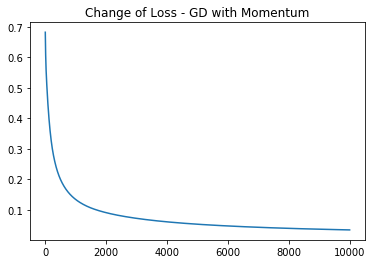

In [99]:
losses,params =grad_desc_m(X,Y,params,0.9,0.1,10000)
plt.plot(losses)
plt.title("Change of Loss - GD with Momentum")
plt.show()

## 6. 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
inp = np.c_[xx.ravel(), yy.ravel()]
y_hat = ff_nn_reLu(tf.Variable(inp.T,dtype='float32'),params)
z=y_hat.numpy()
z= np.where(z >= 0.5, 1, 0)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y)

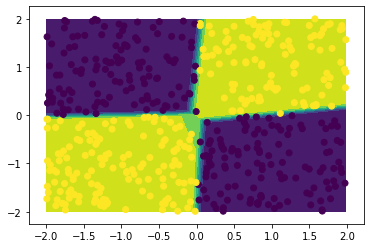

In [113]:
x_min =  np.min(X[:, 0])
x_max =  np.max(X[:, 0])
y_min =  np.min(X[:, 1])
y_max =  np.max(X[:, 1])
 
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
temp = np.c_[x1.ravel(), x2.ravel()]
yhat = ff_nn_reLu(tf.Variable(temp.T,dtype='float32'),params)
yhat=yhat.numpy()
yhat2 = yhat.reshape(x1.shape)
plt.contourf(x1, x2, yhat2)
plt.scatter(X[:, 0], X[:, 1], c=Y)